# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [71]:
# initial imports
import os
import pandas as pd
from panel.interact import interact
from panel import widgets
# import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [72]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("mapbox")

## Load Data

In [73]:
# Read the census data into a Pandas DataFrame

file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(
    file_path,
    index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [74]:
# Calculated the mean number of housing units per year
housing_units = sfo_data["housing_units"]
housing_units_by_year = housing_units.groupby("year").mean()

housing_units_by_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

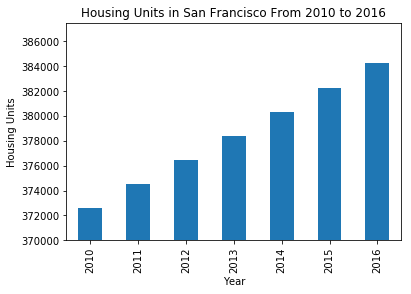

In [75]:
# Plotted the average housing units per year.

fig_housing_units = housing_units_by_year.plot(kind='bar', x="year", y="housing_units", legend=False, title="Housing Units in San Francisco From 2010 to 2016")
fig_housing_units.set_ylabel('Housing Units')
fig_housing_units.set_xlabel('Year')
plt.ylim([370000,387500])

plt.show(fig_housing_units)
plt.close()

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [76]:
# Calculated the average gross rent and average sale price per square foot

gross_rent = sfo_data[["sale_price_sqr_foot", "gross_rent"]]
avg_rent_by_year = gross_rent.groupby("year").mean()
avg_rent_by_year

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


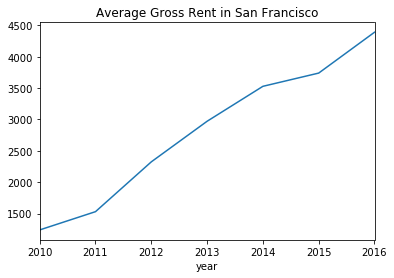

In [77]:
# Plotted the Average Gross Rent per Year as a Line Chart

gross_rent = sfo_data[["gross_rent"]]
avg_rent_by_year = gross_rent.groupby("year").mean().reset_index()

avg_rent = avg_rent_by_year.plot.line(x = "year", y = "gross_rent", legend=False, title="Average Gross Rent in San Francisco")

plt.show(avg_rent)
plt.close()

### Average Sales Price per Year

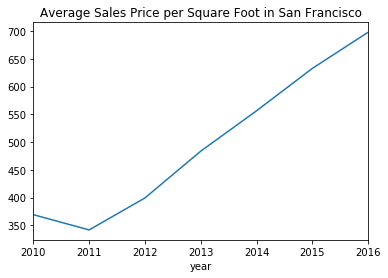

In [78]:
gross_sales = sfo_data[["sale_price_sqr_foot"]]
avg_sales_by_year = gross_sales.groupby("year").mean().reset_index()
# avg_rent_by_year

#avg_rent_by_year.hvplot.line(x = "year", y = "sale_price_sqr_foot", xlabel = "Year", ylabel = "Gross Rent")
#avg_rent_by_year

avg_sales = avg_sales_by_year.plot.line(x = "year", y = "sale_price_sqr_foot", legend=False, title="Average Sales Price per Square Foot in San Francisco")

plt.show(avg_sales)
plt.close()

In [79]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [80]:
# Grouped by year and neighborhood and then created a new dataframe of the mean values -- neighborhoods

neighborhood = sfo_data[["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]]
neighborhoods = neighborhood.groupby(["year", "neighborhood"]).mean().reset_index()
neighborhoods.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [81]:
# Used hvplot to create an interactive line chart of the average price per sq ft.

def choose_neighborhood(): # We input the neighborhood to create
    neighborhood_transactions = pd.DataFrame(
        {
            "neighborhood":sfo_data["neighborhood"],
            "sale_price_sqr_foot": sfo_data["sale_price_sqr_foot"]
        }
    ).sort_values(["year", "sale_price_sqr_foot"])

    return neighborhood_transactions.hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        groupby='neighborhood',
        title="average price per sq ft",
    )

choose_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [82]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [93]:
# Got the data from the top 10 expensive neighborhoods and then created a new dataframe of this data -- neighborhood_10

neighborhood = sfo_data[["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]]
neighborhoods = neighborhood.groupby(["neighborhood"]).mean()
neighborhood_10 = neighborhoods.sort_values('sale_price_sqr_foot', ascending=False).head(10) #.reset_index()
neighborhood_10

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [84]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

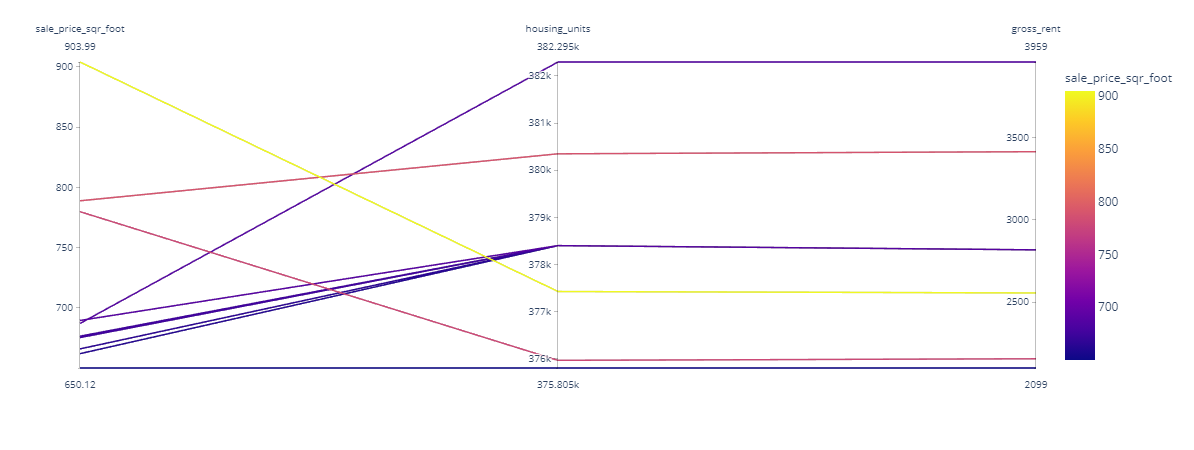

In [85]:
# Plot data using parallel_coordinates plot
parallel_coordinates = px.parallel_coordinates(neighborhood_10, color="sale_price_sqr_foot")

parallel_coordinates

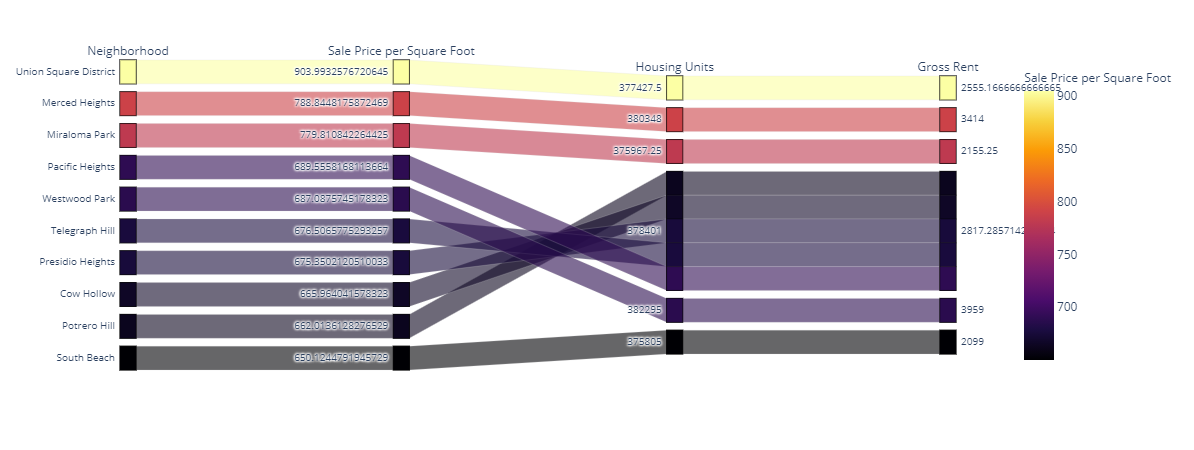

In [86]:
# Plot data using parallel_categories

parallel_categories = px.parallel_categories(
    neighborhood_10,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Square Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent"
    },
)

parallel_categories

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [87]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [88]:
# Calculate the mean values for each neighborhood

neighborhood_values = sfo_data[["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]]
avg_neighborhood_values = neighborhood_values.groupby("neighborhood").mean().reset_index()
avg_neighborhood_values.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [89]:
# Joined the average values with the neighborhood locations

avg_neighborhood_values_cnt = (
    pd.concat([df_neighborhood_locations, avg_neighborhood_values], axis=1).dropna().drop(["neighborhood"], axis = 1)
)

avg_neighborhood_values_cnt.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


In [90]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [91]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

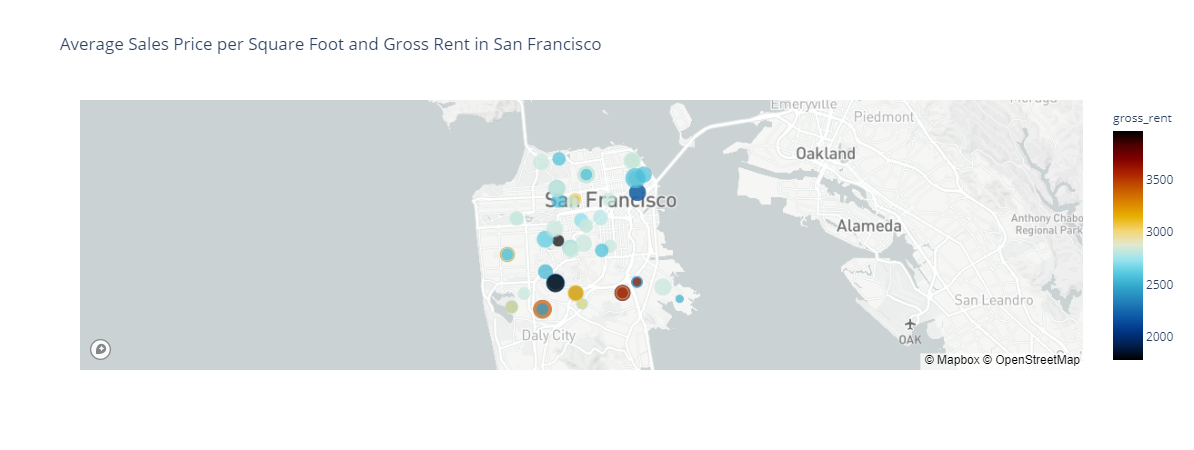

In [92]:
# Created a scatter mapbox to analyze neighborhood average sales price per square foot and gross rent in San Francisco

map_1 = px.scatter_mapbox( 
    avg_neighborhood_values_cnt, 
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Average Sales Price per Square Foot and Gross Rent in San Francisco",
    size_max=15,
    zoom=10
)

map_1.show()